In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def phi_th(E):
    k = 8.4e-5
    T = 900
    return E*np.exp(-E/k/T)

In [4]:
def phi_epi(E):
    return 1/E

In [5]:
def phi_fast(E):
    EE = E/1e6
    return np.sinh(np.sqrt(2*EE))*np.exp(-EE)

In [6]:
from lesson_8_plots import *
cross_section_data = load_cross_sections()
E_xs = cross_section_data["E"]
SigmaT = cross_section_data['U238_t'] + 10*cross_section_data['H1_t']
from scipy.interpolate import interp1d
phi_NR = interp1d(E_xs, 1/(E_xs*SigmaT))

In [7]:
E = np.logspace(-3, 7, 1000)

Text(0, 0.5, '$\\phi(E)$')

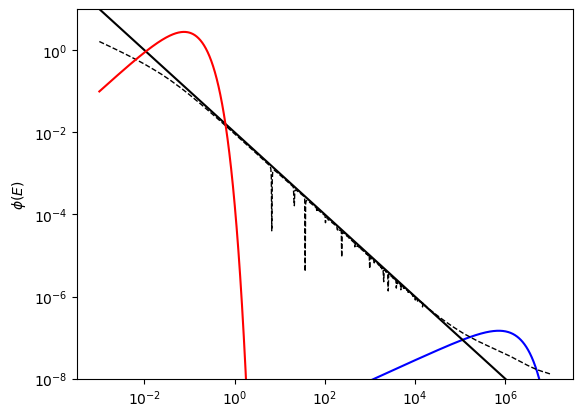

In [9]:
plt.loglog(E, 0.0000002*phi_fast(E), 'b')
plt.loglog(E, 0.01*phi_epi(E), 'k')
plt.loglog(E, 2*phi_NR(E), 'k--', lw=1)
plt.loglog(E, 100*phi_th(E), 'r')
plt.ylim(1e-8, 10)
plt.ylabel("$\phi(E)$")

In [14]:
def spectrum(E):
    phi = np.zeros_like(E)
    f = 100*phi_th(E)
    f[E>1.0] = 0.0
    phi += f 
    f = 0.01*phi_epi(E)
    #f = 2*phi_NR(E)
    f[E<0.5] = 0.0  # choosing 0.5 to smooth it a bit!
    f[E>1e5] = 0.0
    phi += f
    f = 0.0000002*phi_fast(E)
    f[E < 1e5] = 0.0
    phi += f
    return phi

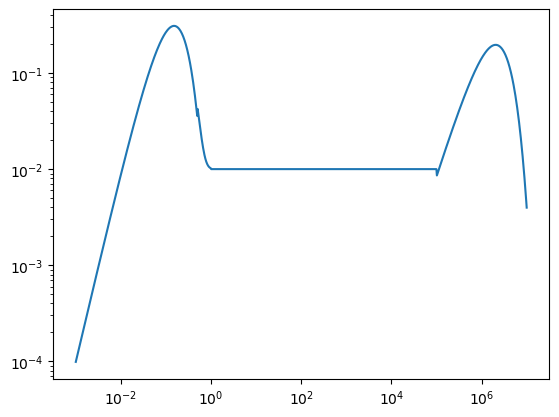

In [16]:
plt.loglog(E, E*spectrum(E)) # phi(E) --> phi(u)  where u = log(E0/E)